# Double Resolution of Provided Grid



In [66]:
# conda env - xgcm

# resample grid

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe


# load in chassignet & xu 2017 - a 1/12th degree resolution dataset
grid = xr.open_dataset("/Users/james/Documents/Github/esm_lab/grid_gen/gridInfo/chassxu/regional.mom6.nc")

# v2 - southern boundary at 5 North - this looks like the winner
latMinInd = 860
latMaxInd = 2550
lonMinInd = 0
lonMaxInd = 1550

# subselect
subgrid = grid.isel(nyp=slice(latMinInd, latMaxInd+1), nxp=slice(lonMinInd,lonMaxInd+1), ny=slice(latMinInd, latMaxInd), nx=slice(lonMinInd,lonMaxInd))
subgrid

np.count_nonzero(np.isnan(subgrid.x.values))

0

In [67]:

# trying air temp example - http://xarray.pydata.org/en/stable/user-guide/interpolation.html#example
#new_lon = np.linspace(ds.lon[0], ds.lon[-1], ds.dims["lon"] * 4)
subgrid_interp = subgrid.interp(nxp=np.linspace(subgrid.nxp[0], subgrid.nxp[-1], subgrid.dims['nxp']*2), 
                                nyp=np.linspace(subgrid.nyp[0], subgrid.nyp[-1], subgrid.dims['nyp']*2),
                                nx=np.linspace(subgrid.nx[0], subgrid.nx[-1], subgrid.dims['nx']*2), 
                                ny=np.linspace(subgrid.ny[0], subgrid.ny[-1], subgrid.dims['ny']*2))
subgrid_interp

<xarray.Dataset>
Dimensions:   (nx: 3100, nxp: 3102, ny: 3380, nyp: 3382)
Dimensions without coordinates: nx, nxp, ny, nyp
Data variables:
    x         (nyp, nxp) float64 -98.04 -98.02 -98.0 ... -37.19 -37.17 -37.15
    y         (nyp, nxp) float64 5.233 5.233 5.233 5.233 ... 58.18 58.18 58.18
    angle_dx  (nyp, nxp) float64 0.0 0.0 0.0 0.0 0.0 ... 6.95 6.96 6.948 6.936
    dx        (nyp, nx) float64 4.435e+03 4.435e+03 ... 2.471e+03 2.472e+03
    dy        (ny, nxp) float64 4.434e+03 4.434e+03 ... 2.32e+03 2.32e+03
    area      (ny, nx) float64 1.966e+07 1.966e+07 ... 5.733e+06 5.734e+06
    tile      |S255 ...
    nxp       (nxp) float64 0.0 0.4998 0.9997 ... 1.549e+03 1.55e+03 1.55e+03
    nyp       (nyp) float64 0.0 0.4999 0.9997 ... 1.689e+03 1.69e+03 1.69e+03
    nx        (nx) float64 0.0 0.4998 0.9997 ... 1.548e+03 1.549e+03 1.549e+03
    ny        (ny) float64 0.0 0.4999 0.9997 ... 1.688e+03 1.689e+03 1.689e+03
Attributes:
    history:  grid_hycom2mom6

In [68]:
np.count_nonzero(np.isnan(subgrid_interp.x.values))

0

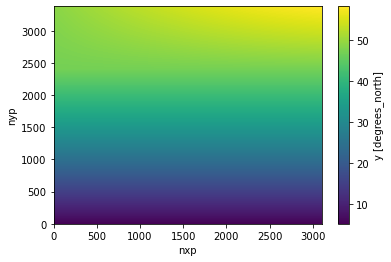

In [70]:
subgrid_interp.y.plot()

In [71]:
topo = xr.open_dataset("/Users/james/Documents/Github/esm_lab/grid_gen/gridInfo/chassxu/09m11/depth_ATLb0.08_09m11_mom6.nc")
subtopo = topo.isel(ny=slice(int(latMinInd/2), int(latMaxInd/2)), nx=slice(int(lonMinInd/2),int(lonMaxInd/2)))
subtopo

<xarray.Dataset>
Dimensions:  (nx: 775, ny: 845)
Dimensions without coordinates: nx, ny
Data variables:
    depth    (ny, nx) float32 ...
    wet      (ny, nx) float32 ...
Attributes:
    comment:  depth_GLBb0.08_09m11 subregioned to ATLb0.08 via isuba_topog | ...
    history:  topo_2mom6

In [72]:
subtopo_interp = subtopo.interp(nx=np.linspace(subtopo.nx[0], subtopo.nx[-1], subtopo.dims['nx']*2), 
                                ny=np.linspace(subtopo.ny[0], subtopo.ny[-1], subtopo.dims['ny']*2))

subtopo_interp

<xarray.Dataset>
Dimensions:  (nx: 1550, ny: 1690)
Dimensions without coordinates: nx, ny
Data variables:
    depth    (ny, nx) float64 0.0 0.0 0.0 0.0 ... 2.923e+03 2.914e+03 2.904e+03
    wet      (ny, nx) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0 1.0
    nx       (nx) float64 0.0 0.4997 0.9994 1.499 ... 772.5 773.0 773.5 774.0
    ny       (ny) float64 0.0 0.4997 0.9994 1.499 ... 842.5 843.0 843.5 844.0
Attributes:
    comment:  depth_GLBb0.08_09m11 subregioned to ATLb0.08 via isuba_topog | ...
    history:  topo_2mom6

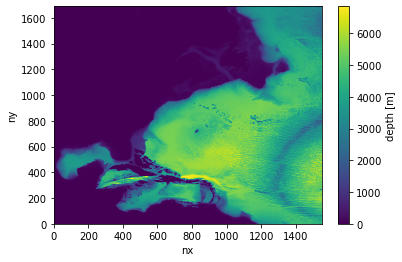

In [73]:
subtopo_interp.depth.plot()